In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_excel('data_2-2.xlsx', sheet_name='new')

In [3]:
df

,Intsance Type,AWS Clients,C,N,Time,Success,Failure
0,c6.in16xlarge,4,4,10,20 mins,147474,0
1,c6.in16xlarge,4,6,10,20 mins,176568,0
2,c6.in16xlarge,5,5,10,20 mins,184352,0
3,c6.in16xlarge,5,6,10,20 mins,58636,16999
4,c6.in16xlarge,6,6,10,20 mins,102006,31326


In [8]:
melted_df = pd.melt(df.loc[:, ['AWS Clients', 'C', 'Success', 'Failure']], ['AWS Clients', 'C'])

In [41]:
# add a new column that is a tuple of 2 columns
melted_df['C'] = melted_df['C'].astype(str)
melted_df['AWS Clients'] = melted_df['AWS Clients'].astype(str)
melted_df['Clients'] = '(' + melted_df['AWS Clients'] + ', ' + melted_df['C'] + ')'
melted_df

,AWS Clients,C,variable,value,Clients
0,4,4,Success,147474,"(4, 4)"
1,4,6,Success,176568,"(4, 6)"
2,5,5,Success,184352,"(5, 5)"
3,5,6,Success,58636,"(5, 6)"
4,6,6,Success,102006,"(6, 6)"
5,4,4,Failure,0,"(4, 4)"
6,4,6,Failure,0,"(4, 6)"
7,5,5,Failure,0,"(5, 5)"
8,5,6,Failure,16999,"(5, 6)"
9,6,6,Failure,31326,"(6, 6)"


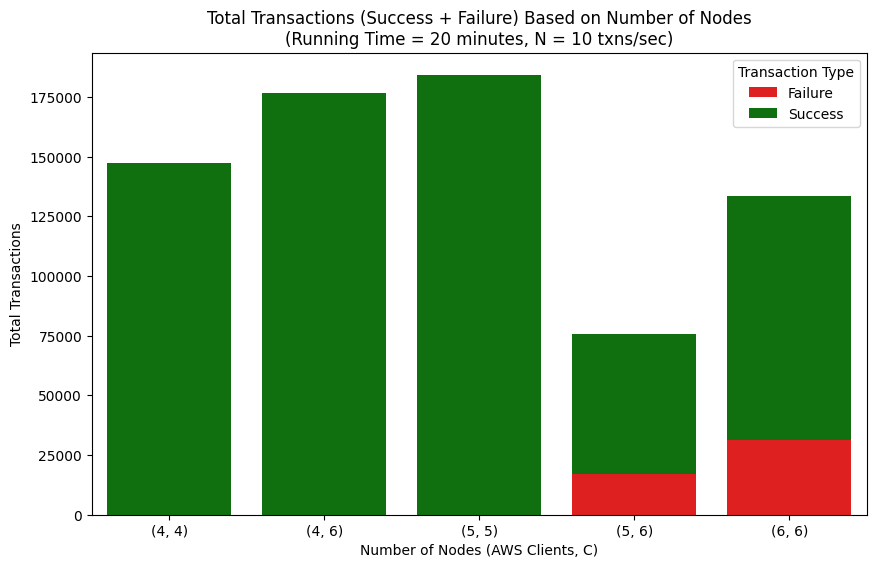

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summing Success and Failure for each Number of Nodes
summed_df = melted_df.pivot_table(index=['Clients'], columns='variable', values='value', aggfunc='sum').reset_index()


# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='Clients', y='Failure', data=summed_df, color='red', label='Failure', ax=ax)
sns.barplot(x='Clients', y='Success', data=summed_df, color='green', label='Success', bottom=summed_df['Failure'], ax=ax)

# Add labels and title
ax.set_title('Total Transactions (Success + Failure) Based on Number of Nodes\n(Running Time = 20 minutes, N = 10 txns/sec)')
ax.set_xlabel('Number of Nodes (AWS Clients, C)')
ax.set_ylabel('Total Transactions')

# Add data labels on bars
# for index, row in summed_df.iterrows():
#     ax.text(row['Number of Nodes'] - 1, row['Failure'] / 2, '{:.0f}'.format(row['Failure']), color='black', ha="center")
#     ax.text(row['Number of Nodes'] - 1, row['Failure'] + row['Success'] / 2, '{:.0f}'.format(row['Success']), color='black', ha="center")

# Add legend
ax.legend(title='Transaction Type')

# Show the plot
plt.show()

In [15]:
df.drop(labels=10, inplace=True)
df.reset_index(drop=True, inplace=True)

In [16]:
df

,AWS Clients,C,N,Running Time,Number of Nodes,Success,Failure
0,4.0,4.0,10.0,20 mins,4.0,147474.0,0.0
1,4.0,4.0,10.0,20 mins,7.0,134131.0,0.0
2,4.0,4.0,10.0,20 mins,10.0,146222.0,0.0
3,4.0,4.0,10.0,20 mins,13.0,128896.0,0.0
4,4.0,4.0,10.0,20 mins,16.0,89370.0,1189.0
5,4.0,4.0,10.0,20 mins,19.0,55397.0,1495.0
6,4.0,4.0,10.0,20 mins,22.0,42586.0,1629.0
7,4.0,4.0,10.0,20 mins,25.0,32620.0,1231.0
8,4.0,4.0,10.0,20 mins,28.0,4659.0,1526.0
9,4.0,4.0,10.0,20 mins,34.0,2603.0,1952.0


In [17]:
melted_df = pd.melt(df.loc[1:10, ['Number of Nodes', 'Success', 'Failure']], ['Number of Nodes'])

In [18]:
melted_df

,Number of Nodes,variable,value
0,7.0,Success,134131.0
1,10.0,Success,146222.0
2,13.0,Success,128896.0
3,16.0,Success,89370.0
4,19.0,Success,55397.0
5,22.0,Success,42586.0
6,25.0,Success,32620.0
7,28.0,Success,4659.0
8,34.0,Success,2603.0
9,4.0,Success,176568.0


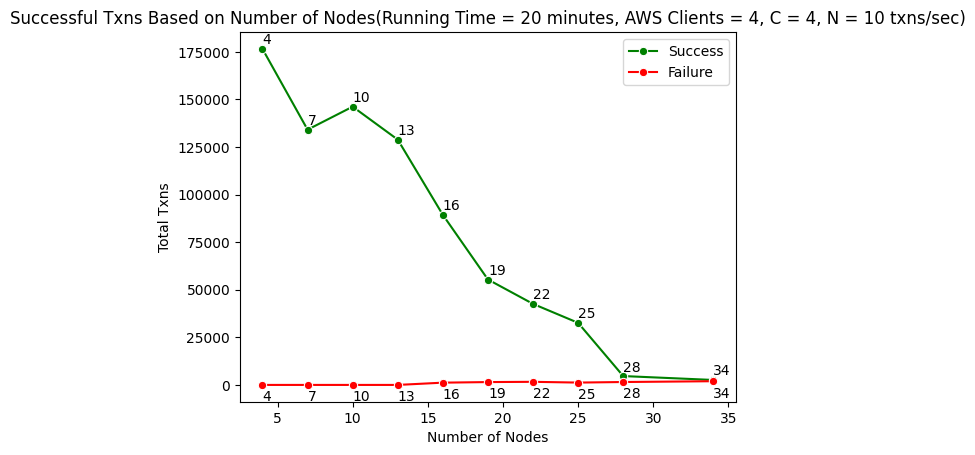

In [19]:
import matplotlib.pyplot as plt

plot = sns.lineplot(data=melted_df, x='Number of Nodes', y='value', hue='variable', legend=True, marker="o", palette=['green', 'red'])
plot.title.set_text('Successful Txns Based on Number of Nodes(Running Time = 20 minutes, AWS Clients = 4, C = 4, N = 10 txns/sec)')

for x, y in zip(melted_df.loc[melted_df['variable'] == 'Success','Number of Nodes'], melted_df.loc[melted_df['variable'] == 'Success','value']):
    plt.text(x = x, # x-coordinate position of data label
    # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
    y = y + 2500, # y-coordinate position of data label, adjusted to be 150 below the data point
    s = '{:.0f}'.format(x), # data label, formatted to ignore decimals
    )

for x, y in zip(melted_df.loc[melted_df['variable'] == 'Failure', 'Number of Nodes'], melted_df.loc[melted_df['variable'] == 'Failure', 'value']):
    plt.text(x = x, # x-coordinate position of data label
    # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
    y = y - 8500, # y-coordinate position of data label, adjusted to be 150 below the data point
    s = '{:.0f}'.format(x), # data label, formatted to ignore decimals
    )

plot.set(ylabel='Total Txns')
_ = plot.legend(title='')

In [20]:
melted_df

,Number of Nodes,variable,value
0,7.0,Success,134131.0
1,10.0,Success,146222.0
2,13.0,Success,128896.0
3,16.0,Success,89370.0
4,19.0,Success,55397.0
5,22.0,Success,42586.0
6,25.0,Success,32620.0
7,28.0,Success,4659.0
8,34.0,Success,2603.0
9,4.0,Success,176568.0


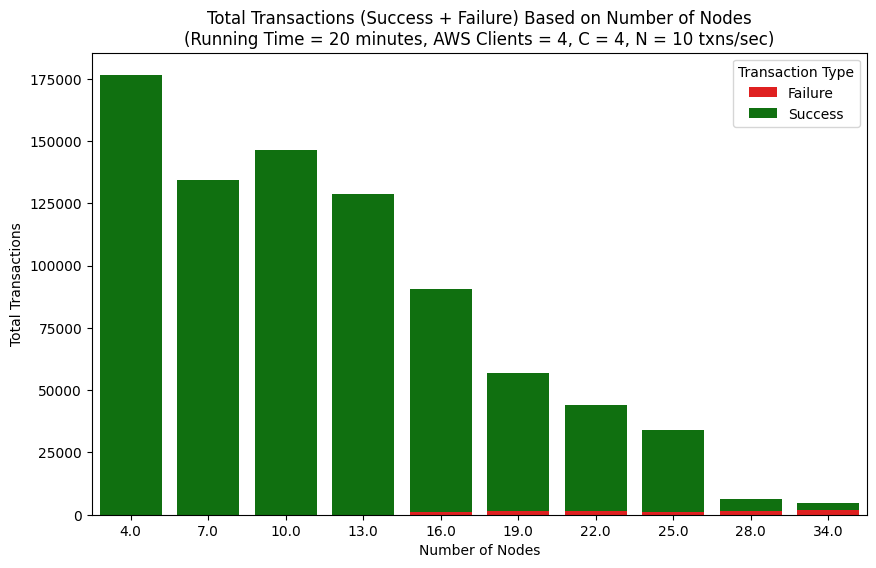

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summing Success and Failure for each Number of Nodes
summed_df = melted_df.pivot_table(index='Number of Nodes', columns='variable', values='value', aggfunc='sum').reset_index()

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='Number of Nodes', y='Failure', data=summed_df, color='red', label='Failure', ax=ax)
sns.barplot(x='Number of Nodes', y='Success', data=summed_df, color='green', label='Success', bottom=summed_df['Failure'], ax=ax)

# Add labels and title
ax.set_title('Total Transactions (Success + Failure) Based on Number of Nodes\n(Running Time = 20 minutes, AWS Clients = 4, C = 4, N = 10 txns/sec)')
ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Total Transactions')

# Add data labels on bars
# for index, row in summed_df.iterrows():
#     ax.text(row['Number of Nodes'] - 1, row['Failure'] / 2, '{:.0f}'.format(row['Failure']), color='black', ha="center")
#     ax.text(row['Number of Nodes'] - 1, row['Failure'] + row['Success'] / 2, '{:.0f}'.format(row['Success']), color='black', ha="center")

# Add legend
ax.legend(title='Transaction Type')

# Show the plot
plt.show()

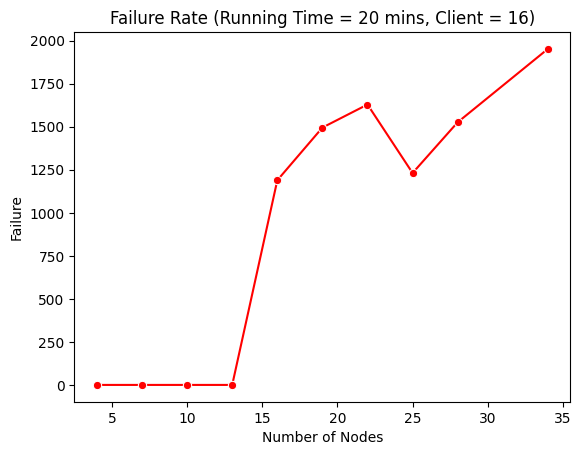

In [48]:
# sns.lineplot(data=df.iloc[:10], x='Number of Nodes', y='Failure', legend=True, marker="o", color='red').title.set_text('Failure Rate (Running Time = 20 mins, Client = 16)')